# Assignment 3

## 1A. Factor Premiums and Factor Decay

In [1200]:
import pandas as pd
import numpy as np

# Read the monthly data CSV into a DataFrame and print the first and last few rows
df_factors = pd.read_excel('class project data (FF MSCI) (July 2023).xlsx', sheet_name = 'FF - 3 factor returns', skiprows=4, nrows=1165, header=None, names=['Date', 'Mkt-RF', 'SMB', 'HML', 'RF'])

# Display the head and tail of the DataFrame
print(df_factors.head())
print(df_factors.tail())

     Date  Mkt-RF   SMB   HML    RF
0  192607    2.96 -2.56 -2.43  0.22
1  192608    2.64 -1.17  3.82  0.25
2  192609    0.36 -1.40  0.13  0.23
3  192610   -3.24 -0.09  0.70  0.32
4  192611    2.53 -0.10 -0.51  0.31
        Date  Mkt-RF   SMB   HML    RF
1160  202303    2.51 -5.51 -8.85  0.36
1161  202304    0.61 -3.35 -0.04  0.35
1162  202305    0.35  1.61 -7.72  0.36
1163  202306    6.46  1.54 -0.26  0.40
1164  202307    3.21  2.07  4.13  0.45


In [1201]:
# Change the Date column to a datetime object and set it as the index
df_factors["Date"] = pd.to_datetime(df_factors["Date"], format='%Y%m')
df_factors["Date"] = df_factors["Date"].dt.to_period('M')
df_factors.set_index("Date", inplace=True)


# Print the first few rows of the modified DataFrame
df_factors.head()

,Mkt-RF,SMB,HML,RF
Date,,,,
1926-07,2.96,-2.56,-2.43,0.22
1926-08,2.64,-1.17,3.82,0.25
1926-09,0.36,-1.40,0.13,0.23
1926-10,-3.24,-0.09,0.70,0.32
1926-11,2.53,-0.10,-0.51,0.31


In [1238]:
# Filter the dataframe for the two time periods
df_1927_1992 = df_factors.loc['1927-01':'1992-12']
df_1993_2023 = df_factors.loc['1993-01':'2023-07']

factors = ['Mkt-RF', 'SMB', 'HML']

def t_stat(df, factors):
    t_stats_am = {}
    t_stats_gm = {}
    len_df = len(df)
    # t_stat = (mean - population_mean) / (std / sqrt(n))
    for factor in factors:
        # Calculate the t_stats from mean ( how to calculate populated mean ?) and standard deviation
        temp = df[factor]/100
        std_df = np.std(temp)
        se = std_df/np.sqrt(len_df)
        # https://www.investopedia.com/ask/answers/06/geometricmean.asp
        t_stats_am[factor] = np.mean(temp)/se
        t_stats_gm[factor] = (np.prod(1 + temp)**(1/len_df) - 1)/se
    return t_stats_am, t_stats_gm

# Calculate the t-statistic
t_stat_1927_1992_am, t_stat_1927_1992_gm = t_stat(df_1927_1992, factors)
t_stat_1993_2023_am, t_stat_1993_2023_gm = t_stat(df_1993_2023, factors)

print("T-Stats for 1927-1992")
print('\nWith Arithmetic Mean')
for key, value in t_stat_1927_1992_am.items():
    print(f'{key}: {value}')
    
print('\nWith Geometric Mean')
for key, value in t_stat_1927_1992_gm.items():
    print(f'{key}: {value}')
    
print("\nT-Stats for 1993-2023")
print('\nWith Arithmetic Mean')
for key, value in t_stat_1993_2023_am.items():
    print(f'{key}: {value}')

print('\nWith Geometric Mean')
for key, value in t_stat_1993_2023_gm.items():
    print(f'{key}: {value}')
    
print('\n Since return spreads are calculated. Arithmetic mean is preferred over geometric. This is because arithmetic mean shows period-to-period difference between the returns. Spreads dont compound. \n')
    
    
print("The t-statistic for the 1927-1992 period is higher than the 1993-2023 period for all factors. This indicates that the 1927-1992 period had a higher level of significance in the factors than the 1993-2023 period.")

T-Stats for 1927-1992

With Arithmetic Mean
Mkt-RF: 3.2205625120989674
SMB: 2.1271515550073685
HML: 3.335204505925686

With Geometric Mean
Mkt-RF: 2.417559767205432
SMB: 1.6993284993005768
HML: 2.8476094098455444

T-Stats for 1993-2023

With Arithmetic Mean
Mkt-RF: 3.095629461680783
SMB: 0.6002049027386961
HML: 0.8315327229762526

With Geometric Mean
Mkt-RF: 2.663414942119485
SMB: 0.2989505009916945
HML: 0.5108141399346273

 Since return spreads are calculated. Arithmetic mean is preferred over geometric. This is because arithmetic mean shows period-to-period difference between the returns. Spreads dont compound. 

The t-statistic for the 1927-1992 period is higher than the 1993-2023 period for all factors. This indicates that the 1927-1992 period had a higher level of significance in the factors than the 1993-2023 period.


In [ ]:
# Read the monthly data CSV into a DataFrame and print the first few rows
df_returns_beta = pd.read_excel('class project data (FF MSCI) (July 2023).xlsx', sheet_name = 'FF - portfolios sorted on beta', skiprows=16, nrows=721, header=None, names=['Date', 'Lo 20', 'Qnt 2', 'Qnt 3', 'Qnt 4' , 'Hi 20', 'Lo 10' , '02-Dec' , '03-Dec' , '04-Dec' ,'05-Dec' ,'06-Dec' , '07-Dec' , '08-Dec', '09-Dec' , 'Hi 10'])

df_returns_beta["Date"] = pd.to_datetime(df_returns_beta["Date"], format='%Y%m')
df_returns_beta["Date"] = df_returns_beta["Date"].dt.to_period('M')
df_returns_beta.set_index("Date", inplace=True)

# Convert the columns to numeric
df_returns_beta['Lo 10'] = pd.to_numeric(df_returns_beta['Lo 10'], errors='coerce')
df_returns_beta['Hi 10'] = pd.to_numeric(df_returns_beta['Hi 10'], errors='coerce')

# Calculate
df_returns_beta['Beta Spread'] = df_returns_beta['Lo 10'] - df_returns_beta['Hi 10']

print(df_returns_beta[['Beta Spread']].head())



         Beta Spread
Date                
1963-07         2.13
1963-08        -6.95
1963-09         0.58
1963-10        -1.77
1963-11        -1.43


In [1204]:
# Read the monthly data CSV into a DataFrame and print the first few rows
df_returns_mom = pd.read_excel('class project data (FF MSCI) (July 2023).xlsx', sheet_name = 'FF - portfolios sorted on pmom', skiprows=11, nrows=1159, header=None, names=['Date', 'Lo PRIOR',	'PRIOR 2', 'PRIOR 3', 'PRIOR 4'	, 'PRIOR 5','PRIOR 6', 'PRIOR 7', 'PRIOR 8', 'PRIOR 9' , 'Hi PRIOR'])
df_returns_mom["Date"] = pd.to_datetime(df_returns_mom["Date"], format='%Y%m')
df_returns_mom["Date"] = df_returns_mom["Date"].dt.to_period('M')
df_returns_mom.set_index("Date", inplace=True)

df_returns_mom['Lo PRIOR'] = pd.to_numeric(df_returns_mom['Lo PRIOR'], errors='coerce')
df_returns_mom['Hi PRIOR'] = pd.to_numeric(df_returns_mom['Hi PRIOR'], errors='coerce')

df_returns_mom['Momentum Spread'] = df_returns_mom['Hi PRIOR'] - df_returns_mom['Lo PRIOR']

print(df_returns_mom[[ 'Momentum Spread']].head())

         Momentum Spread
Date                    
1927-01             3.08
1927-02            -0.52
1927-03             8.70
1927-04             3.45
1927-05             3.60


## 1B. Factor Index Construction in Practice

Q1. The Investable universe for the MSCI index consists of all the existing constituents of an underlying MSCI parent index. This ensures that the investable universe has sufficient liquidity and capacity by depending on broader MSCI country or regional Index. (Section 2.1)

Q2. Price momentum in the MSCI momentum index is calculated using 6 months and 12 months local price performance of each security. 
### Price Momentum Calculations

- **6-month Price Momentum**:  
  $((P_{T-1} /P_{T-7})-1)$ – (Local Risk-free rate)

- **12-month Price Momentum**:  
  $((P_{T-1} /P_{T-13})-1)$ - (Local Risk-free rate)

where:
- $P_{T-1}$ = Security local price one month prior to the rebalancing date (T).
- $P_{T-7}$ = Security local price seven months prior to the rebalancing date (T).
- $P_{T-13}$ = Security local price thirteen months prior to the rebalancing date (T).

If 12 month price momentum is missing, only 6 month  price momentum is used for computing momentum value and vice versa if 6 months is missing. Local risk free rates are the short-term rates in local currency of the country, typically the 3M LIBOR rate or short-term deposit rate. (Section 2.2)

Q3. Price momentum is standardized across stocks by calculating a risk adjusted momentum value for each security, Which is converted to Z-Score. Risk adjusted momentum is calculated by dividing price momentum by its annualized standard deviation of weekly returns over 3 years. This normalizes the impact of volatility across stocks. These are standardized into Z-Scores and then averaged out using 6 months and 12 months to produce single combined momentum z-score. 

To control the extreme values the momentum z-score is winsorized at +/-3. The values beyond 3 or below -3 are capped at the respective values.

Q4. Selected stocks are weighted by finding out weight calculation (Each stock weight in the index is product of its market cap weight in parent index and its momentum score) then the momentum weight is normalized to 100%.

### Benifits
1. By including market cap, the index emphasizes larger, more liquid stocks. This reduces impact of individual trade on stock prices.
2. Weight of marketcap also reduces the volatility of the index. 

### Detriments
1. Lower weight will be given to the high momentum stocks that have smaller market cap. This could dilute momentum factor.

Q5. MSCI Momentum Index is rebalanced semi-anually in May and November coinciding with the May and November Semi-Annual Index Review(SAIR) of the MSCI Global Investable Market Indexes. 

Q6. In addition to semi annual reviews MSCI momentum index, it undergos ad-hoc trigger based rebalancing based on trigger conditions, Which are checked every month. The trigger is based on montly change in volatility if it crossed threshold (95 percentile of monthly change of parent index) rebalancing happens.  During these periods, the index rebalances using only the 6-month momentum score, rather than the typical combination of 6- and 12-month scores, to capture recent shifts in momentum more accurately.

### Benifits
1. By rebalancing index can adapt its composition to better reflect the current market, reducing exposure to sharp decline of stocks, minimizing potential loss.
2. Ad-hoc can help address cases when stocks lose their momentum advantage. Investors can refocus on other stocks or securities that continue to exihibit strong momentum.
3. Ad-hoc allows investors to quickly respond to changes in the market. Investors can recalibrate to other stocks with stronger recent momentum even when market volatility is high.

Q7. MSCI Momentum Index applies caps on individual security weights to reduce concentration risk. 
Broad Regional and Country Indexes: For these indexes, an individual issuer’s weight is capped at 5%. This ensures no single security can dominate the index, promoting a more balanced exposure across multiple stocks.
Narrow Country or Regional Indexes: is defined as an index for which maximum market cap weight in the Parent Index is greater than 10%. This is particularly relevant when an index has a few dominant companies, as it prevents these large-cap stocks from skewing the index too heavily.


## 1C. Benefits of factor diversification

In [1228]:
# Read the monthly data CSV into a DataFrame and print the first and last few rows
us_msci_ff_data = pd.read_excel('class project data (FF MSCI) (July 2023).xlsx', sheet_name= 'MSCI - factor totret index', skiprows=7, nrows=344, header=None, names=['Date', 'Standard', 'Value Standard', 'Minimum Volatility', 'Equal Weighted', 'Momentum Standard'], parse_dates=['Date'])

us_msci_ff_data["Date"] = pd.to_datetime(us_msci_ff_data["Date"], format='%Y%m')
us_msci_ff_data["Date"] = us_msci_ff_data["Date"].dt.to_period('M')
us_msci_ff_data.set_index('Date', inplace=True)

# Convert relevant columns to numeric types
columns = ['Standard', 'Value Standard', 'Minimum Volatility', 'Equal Weighted', 'Momentum Standard']
for column in columns:
    us_msci_ff_data[column] = us_msci_ff_data[column].str.replace(',', '')
    us_msci_ff_data[column] = pd.to_numeric(us_msci_ff_data[column], errors='coerce')
    us_msci_ff_data[column + ' Return'] = us_msci_ff_data[column].pct_change()

us_msci_ff_data.dropna()

us_msci_ff_data['Multi Factor Index Return'] = (us_msci_ff_data['Value Standard Return'] + us_msci_ff_data['Minimum Volatility Return'] + us_msci_ff_data['Equal Weighted Return'] + us_msci_ff_data['Momentum Standard Return'])/4

# Define the start and end dates
start_date = '1995-01'
end_date = '2023-07'

# Filter the DataFrame based on the date range using the index
df_factors_filtered = df_factors.loc[start_date:end_date]

terms = len(df_factors_filtered)

annualized_data = {}
columns.append('Multi Factor Index')

print('Annualized Returns','\n')
# Calculate the annualized returns for the columns
for column in columns:
    annualized_return = ((1 + us_msci_ff_data[column + ' Return']).prod()**(12/terms) )- 1
    annualized_data[column + ' Return'] = annualized_return
    print(f'{column}: {annualized_return:.4f} = {annualized_return*100:.2f}%')
    

# Calculate the annualized risk-free rate
annualized_rf = ((1 + df_factors_filtered['RF']/100).prod()**(12/terms)) - 1
annualized_data['Risk Free Rate'] = annualized_rf

print(f'Risk-free rate: {annualized_rf:.4f} = {annualized_rf*100:.2f}%','\n')

print('Sharpe Ratios','\n')

for column in columns:
    sharpe_ratio = (annualized_data[column + ' Return'] - annualized_rf) / (us_msci_ff_data[column + ' Return'].std()*np.sqrt(12))
    print(f'{column}: {sharpe_ratio:.4f}')
    


Annualized Returns 

Standard: 0.1049 = 10.49%
Value Standard: 0.0905 = 9.05%
Minimum Volatility: 0.1013 = 10.13%
Equal Weighted: 0.1082 = 10.82%
Momentum Standard: 0.1272 = 12.72%
Multi Factor Index: 0.1082 = 10.82%
Risk-free rate: 0.0218 = 2.18% 

Sharpe Ratios 

Standard: 0.5379
Value Standard: 0.4497
Minimum Volatility: 0.6569
Equal Weighted: 0.5042
Momentum Standard: 0.6446
Multi Factor Index: 0.6000


## 1D. Sensitivity of factor returns to factor portfolio construction



In [1206]:
# Filter the Fama-French data based on the date range
ff_data = df_factors.loc[start_date:end_date]
ff_data['MOM'] = df_returns_mom.loc[start_date:end_date][['Momentum Spread']]
ff_data['BAB'] = df_returns_beta.loc[start_date:end_date][['Beta Spread']]

print(ff_data.head())



# Calculate the spread of the 4 individual smart-beta strategies over the broad USA equity market index
us_msci_ff_data['Value Spread'] = us_msci_ff_data['Value Standard Return'] - us_msci_ff_data['Standard Return']
us_msci_ff_data['Minimum Volatility Spread'] = us_msci_ff_data['Minimum Volatility Return'] - us_msci_ff_data['Standard Return']
us_msci_ff_data['Equal Weighted Spread'] = us_msci_ff_data['Equal Weighted Return'] - us_msci_ff_data['Standard Return']
us_msci_ff_data['Momentum Spread'] = us_msci_ff_data['Momentum Standard Return'] - us_msci_ff_data['Standard Return']

us_msci_ff_data.dropna()

# Calculate the correlation of each of those four factor spreads to each of the four Fama-French monthly return spreads
correlation_matrix = pd.DataFrame(index=['Value Spread', 'Minimum Volatility Spread', 'Equal Weighted Spread', 'Momentum Spread'],
                                  columns=['HML', 'SMB', 'MOM', 'BAB'])

correlation_matrix.loc['Value Spread', 'HML'] = us_msci_ff_data['Value Spread'].corr(ff_data['HML'])
correlation_matrix.loc['Value Spread', 'SMB'] = us_msci_ff_data['Value Spread'].corr(ff_data['SMB'])
correlation_matrix.loc['Value Spread', 'MOM'] = us_msci_ff_data['Value Spread'].corr(ff_data['MOM'])
correlation_matrix.loc['Value Spread', 'BAB'] = us_msci_ff_data['Value Spread'].corr(ff_data['BAB'])


correlation_matrix.loc['Minimum Volatility Spread', 'HML'] = us_msci_ff_data['Minimum Volatility Spread'].corr(ff_data['HML'])
correlation_matrix.loc['Minimum Volatility Spread', 'SMB'] = us_msci_ff_data['Minimum Volatility Spread'].corr(ff_data['SMB'])
correlation_matrix.loc['Minimum Volatility Spread', 'MOM'] = us_msci_ff_data['Minimum Volatility Spread'].corr(ff_data['MOM'])
correlation_matrix.loc['Minimum Volatility Spread', 'BAB'] = us_msci_ff_data['Minimum Volatility Spread'].corr(ff_data['BAB'])


correlation_matrix.loc['Equal Weighted Spread', 'HML'] = us_msci_ff_data['Equal Weighted Spread'].corr(ff_data['HML'])
correlation_matrix.loc['Equal Weighted Spread', 'SMB'] = us_msci_ff_data['Equal Weighted Spread'].corr(ff_data['SMB'])
correlation_matrix.loc['Equal Weighted Spread', 'MOM'] = us_msci_ff_data['Equal Weighted Spread'].corr(ff_data['MOM'])
correlation_matrix.loc['Equal Weighted Spread', 'BAB'] = us_msci_ff_data['Equal Weighted Spread'].corr(ff_data['BAB'])


correlation_matrix.loc['Momentum Spread', 'HML'] = us_msci_ff_data['Momentum Spread'].corr(ff_data['HML'])
correlation_matrix.loc['Momentum Spread', 'SMB'] = us_msci_ff_data['Momentum Spread'].corr(ff_data['SMB'])
correlation_matrix.loc['Momentum Spread', 'MOM'] = us_msci_ff_data['Momentum Spread'].corr(ff_data['MOM'])
correlation_matrix.loc['Momentum Spread', 'BAB'] = us_msci_ff_data['Momentum Spread'].corr(ff_data['BAB'])

print(correlation_matrix)

# Comment on the similarity between the Fama-French factor return spreads and those calculated based on the MSCI smart-beta indexes
comment = """
The correlation matrix shows the relationship between the factor spreads calculated from the MSCI smart-beta indexes and the Fama-French factor return spreads. 
High correlation values indicate a strong relationship between the corresponding factors, suggesting that the MSCI smart-beta indexes capture similar factor exposures as the Fama-French factors.
Low correlation values indicate a weaker relationship, suggesting differences in the factor exposures captured by the MSCI smart-beta indexes and the Fama-French factors.
"""
print(comment)

         Mkt-RF   SMB   HML    RF   MOM   BAB
Date                                         
1995-01    1.80 -3.50  2.57  0.42 -3.46  1.22
1995-02    3.63 -0.66  1.08  0.40  1.14 -2.72
1995-03    2.19 -0.16 -2.15  0.46  3.60  0.63
1995-04    2.11 -0.49  1.71  0.44  1.94  3.09
1995-05    2.90 -2.55  2.29  0.54 -0.11 -0.59
                                HML       SMB       MOM       BAB
Value Spread                0.72832 -0.177026 -0.243478  0.414829
Minimum Volatility Spread  0.231505 -0.306972  0.303188  0.814676
Equal Weighted Spread      0.430786  0.321624 -0.448468 -0.199402
Momentum Spread            -0.22251  0.079246  0.642596   0.14025

The correlation matrix shows the relationship between the factor spreads calculated from the MSCI smart-beta indexes and the Fama-French factor return spreads. 
High correlation values indicate a strong relationship between the corresponding factors, suggesting that the MSCI smart-beta indexes capture similar factor exposures as the Fama-French 

C:\Users\saiki\AppData\Local\Temp\ipykernel_45348\4176968372.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ff_data['MOM'] = df_returns_mom.loc[start_date:end_date][['Momentum Spread']]
C:\Users\saiki\AppData\Local\Temp\ipykernel_45348\4176968372.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ff_data['BAB'] = df_returns_beta.loc[start_date:end_date][['Beta Spread']]


## 2A. Data cleaning and validation

In [1207]:
df_stocks_data = pd.read_csv('class project data (part 2 - factor portfolio construction).csv' , usecols=['stock_id', 'date','Pb', 'R1M_Usd', 'Bv', 'Mkt_Cap_3M_Usd'], parse_dates=['date'])       # Load the data
df_stocks_data['date'] = pd.to_datetime(df_stocks_data['date'])       # Convert the date column to datetime format
df_stocks_data['date'] = df_stocks_data['date'].dt.to_period('M')       # Convert the date column to period format
date_counts = df_stocks_data['date'].value_counts()


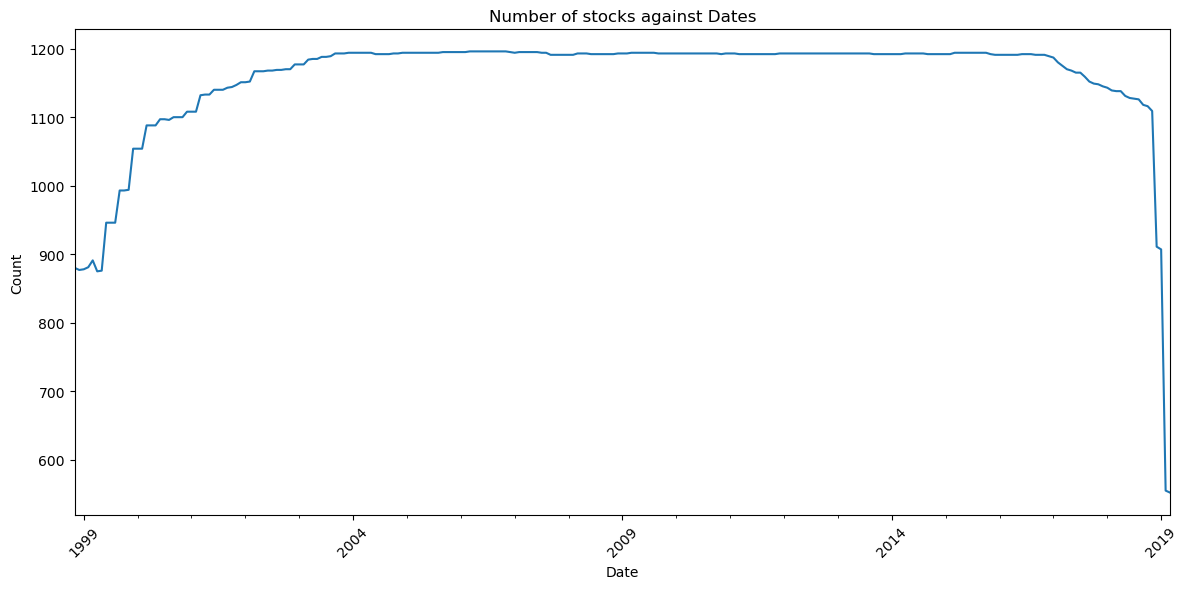

The counts of each date are not uniform. This indicates that the data is not evenly distributed across the dates.
date
1998-11    880
1998-12    877
1999-01    878
1999-02    881
1999-03    891
Freq: M, Name: count, dtype: int64
date
2018-11    1109
2018-12     911
2019-01     907
2019-02     555
2019-03     552
Freq: M, Name: count, dtype: int64
Month of 2019 March has the lowest count, which is returns of 2019 April.


In [1208]:
import matplotlib.pyplot as plt

date_counts = date_counts.sort_index()

# Plot the counts
plt.figure(figsize=(12, 6))
date_counts.plot()
plt.title('Number of stocks against Dates')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("The counts of each date are not uniform. This indicates that the data is not evenly distributed across the dates.")
print(date_counts.head())
print(date_counts.tail())
print("Month of 2019 March has the lowest count, which is returns of 2019 April.")

count    283380.000000
mean          0.012633
std           0.177877
min          -0.922000
25%          -0.044000
50%           0.011000
75%           0.064000
max          30.176000
Name: R1M_Usd, dtype: float64


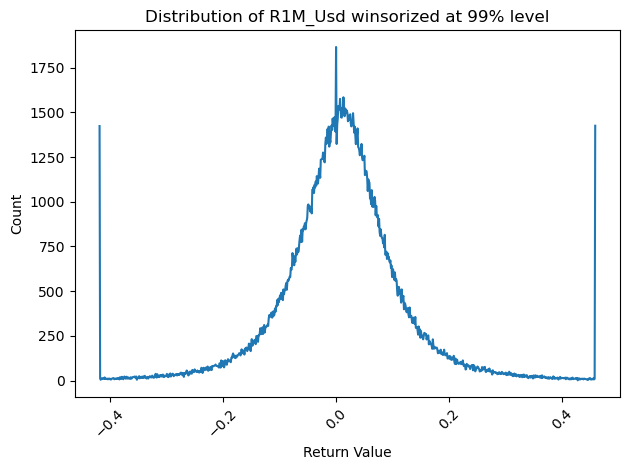

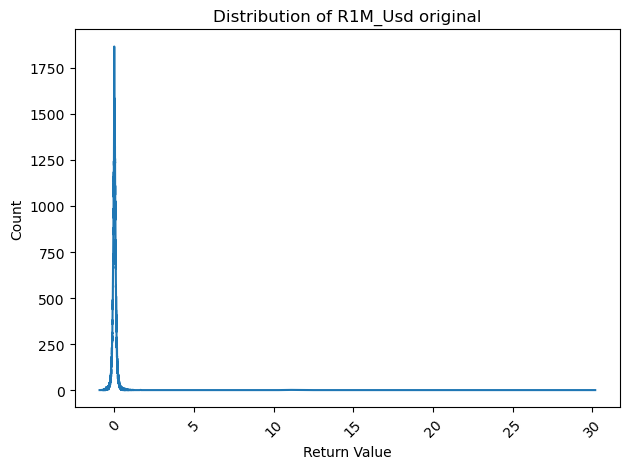

The outliers are at the higher end with maximum being 30.176 for R1M_Usd. The winsorized data has a more uniform distribution compared to the original data.


In [1209]:
from scipy.stats.mstats import winsorize

# Calculate basic statistics
basic_stats = df_stocks_data['R1M_Usd'].describe()

# Display the basic statistics
print(basic_stats)

# Winsorize the counts
R1M_values_winsorized = winsorize(df_stocks_data['R1M_Usd'], limits=[0.005, 0.005])

# Find max and min values
max_value = np.max(R1M_values_winsorized)
min_value = np.min(R1M_values_winsorized)

R1M_counts_winsorized = pd.Series(R1M_values_winsorized).value_counts().sort_index()

R1M_counts_original = df_stocks_data['R1M_Usd'].value_counts().sort_index()

plt.figure()
R1M_counts_winsorized.plot()
plt.title('Distribution of R1M_Usd winsorized at 99% level')
plt.xlabel('Return Value')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure()
R1M_counts_original.plot()
plt.title('Distribution of R1M_Usd original')
plt.xlabel('Return Value')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("The outliers are at the higher end with maximum being 30.176 for R1M_Usd. The winsorized data has a more uniform distribution compared to the original data.")

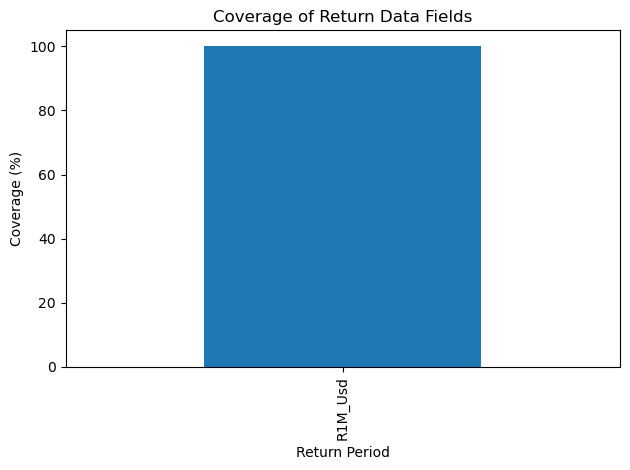

Stocks with missing return data in any period: []

To treat stocks with missing return data in any period, you have several options:
1. Remove stocks with missing data: This is the simplest approach but may reduce the sample size.
2. Replace missing values: Replace missing value with the mean, median, or past value of the stock.
3. Use models that handle missing data: Some machine learning models can handle missing data directly.

The choice of strategy depends on the extent of missing data and the impact on your analysis. Removing stocks with missing data is straightforward but may lead to biased results if the missing data is not random. Imputation can help retain more data but requires careful consideration of the imputation method to avoid introducing bias.



In [1210]:
# Calculate the percentage of non-missing values for each return data field
coverage = df_stocks_data[['R1M_Usd']].notna().mean() * 100

# Plot the coverage for each period
plt.figure()
coverage.plot(kind='bar')
plt.title('Coverage of Return Data Fields')
plt.xlabel('Return Period')
plt.ylabel('Coverage (%)')
plt.tight_layout()
plt.show()

# Identify stocks with missing return data in any period
missing_data = df_stocks_data[['stock_id', 'R1M_Usd']].isna().any(axis=1)
stocks_with_missing_data = df_stocks_data.loc[missing_data, 'stock_id'].unique()

print(f"Stocks with missing return data in any period: {stocks_with_missing_data}")

# Discuss how to treat these stocks in your analysis
treatment_strategy = """
To treat stocks with missing return data in any period, you have several options:
1. Remove stocks with missing data: This is the simplest approach but may reduce the sample size.
2. Replace missing values: Replace missing value with the mean, median, or past value of the stock.
3. Use models that handle missing data: Some machine learning models can handle missing data directly.

The choice of strategy depends on the extent of missing data and the impact on your analysis. Removing stocks with missing data is straightforward but may lead to biased results if the missing data is not random. Imputation can help retain more data but requires careful consideration of the imputation method to avoid introducing bias.
"""

print(treatment_strategy)


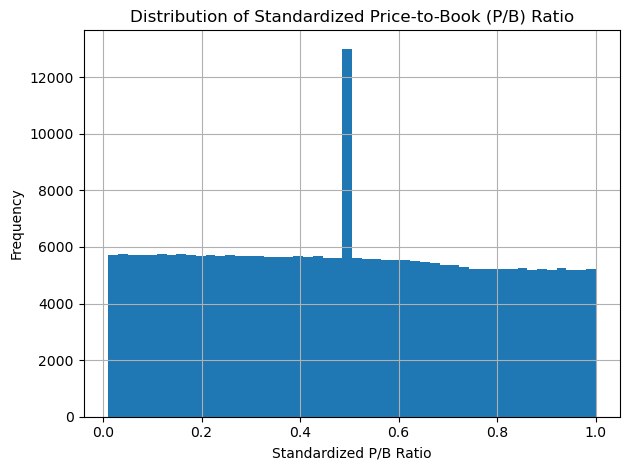

Standout P/B values: 0         0.5
1         0.5
2         0.5
3         0.5
4         0.5
         ... 
283015    0.5
283016    0.5
283122    0.5
283123    0.5
283124    0.5
Name: Pb, Length: 10197, dtype: float64

The Fama-French HML (High Minus Low) value factor is constructed by sorting stocks into portfolios based on their book-to-market (B/M) ratios. 
Stocks with high B/M ratios (low P/B ratios) are considered value stocks, while those with low B/M ratios (high P/B ratios) are considered growth stocks.

If there are standout values in the standardized P/B field, it may indicate extreme cases of overvaluation or undervaluation. 
In constructing value portfolios, you might consider excluding these extreme values to avoid potential outliers that could skew the results.

Alternatively, you could investigate these standout values further to understand the underlying reasons for their extremity and decide whether to include or exclude them based on your findings.

Correlation between s

In [1211]:
plt.figure()
df_stocks_data['Pb'].hist(bins=50)
plt.title('Distribution of Standardized Price-to-Book (P/B) Ratio')
plt.xlabel('Standardized P/B Ratio')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Identify any standout values
standout_values = df_stocks_data['Pb'][df_stocks_data['Pb'] == 0.5] 
print(f"Standout P/B values: {standout_values}")

# Discuss implications based on Fama-French HML value factor
implications = """
The Fama-French HML (High Minus Low) value factor is constructed by sorting stocks into portfolios based on their book-to-market (B/M) ratios. 
Stocks with high B/M ratios (low P/B ratios) are considered value stocks, while those with low B/M ratios (high P/B ratios) are considered growth stocks.

If there are standout values in the standardized P/B field, it may indicate extreme cases of overvaluation or undervaluation. 
In constructing value portfolios, you might consider excluding these extreme values to avoid potential outliers that could skew the results.

Alternatively, you could investigate these standout values further to understand the underlying reasons for their extremity and decide whether to include or exclude them based on your findings.
"""

print(implications)

# Perform a sanity check to ensure the P/B value is indeed the ratio between market cap and book value
# Since the fields are standardized, we can check the correlation between the standardized P/B ratio multiplied by Book value and standardized market cap
df_stocks_data['Mkt_Cap_temp'] = (df_stocks_data['Pb'] * df_stocks_data['Bv'])
correlation = df_stocks_data[['Mkt_Cap_temp', 'Mkt_Cap_3M_Usd']].corr().iloc[0, 1]

print(f"Correlation between standardized P/B multiplied by Book value standardized and Market cap standardized: {correlation}")

sanity_check = """
A high correlation between the standardized Market cap and the multiplication of standardized P/B and standardized book value would indicate that the P/B value is indeed the ratio between market cap and book value.
If the correlation is low, it may suggest inconsistencies in the data or the need for further investigation.
"""

print(sanity_check)

C:\Users\saiki\AppData\Local\Temp\ipykernel_45348\1822146003.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_return = df_stocks_data_period.groupby('date').apply(lambda x: np.average(x['R1M_Usd'], weights= x['Mkt_Cap_3M_Usd']))


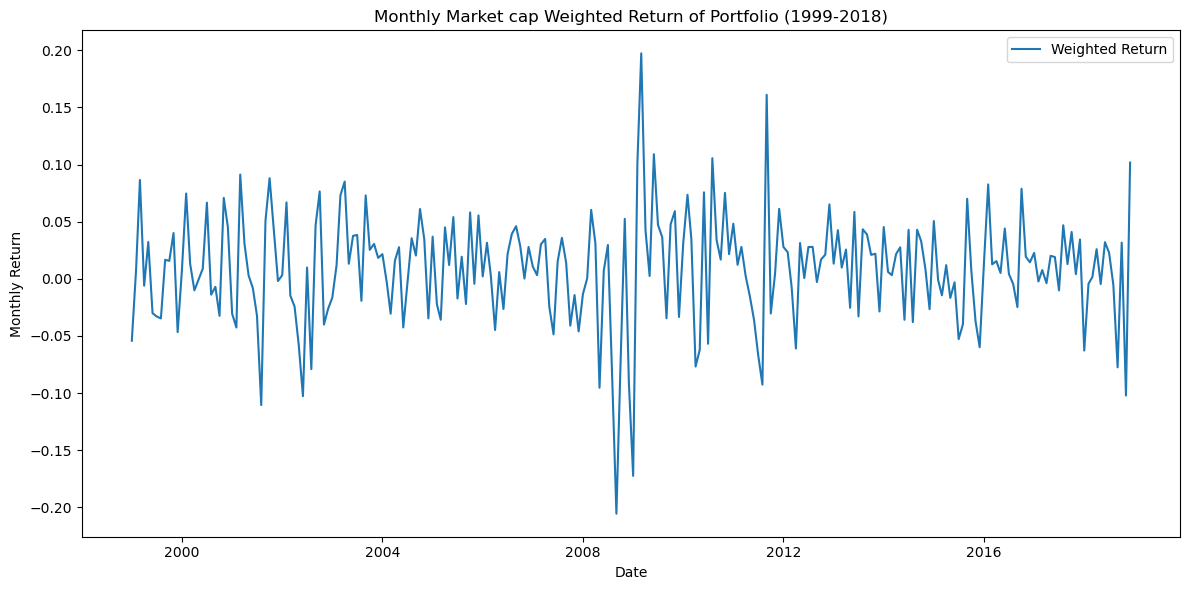

In [ ]:

# Filter the data to include only dates from January 1998 to December 2018
start_date = pd.Period('1999-01', freq='M')
end_date = pd.Period('2018-12', freq='M')
df_stocks_data_period = df_stocks_data[(df_stocks_data['date'] >= start_date) & (df_stocks_data['date'] <= end_date)]

# Calculate the weighted return for each stock in each period
weighted_return = df_stocks_data_period.groupby('date').apply(lambda x: np.average(x['R1M_Usd'], weights= x['Mkt_Cap_3M_Usd']))

# Plot the weighted returns for both portfolios
plt.figure(figsize=(12, 6))
plt.plot(weighted_return.index.to_timestamp(), weighted_return, label='Weighted Return')
plt.title('Monthly Market cap Weighted Return of Portfolio (1999-2018)')
plt.xlabel('Date')
plt.ylabel('Monthly Return')
plt.legend()
plt.tight_layout()
plt.show()

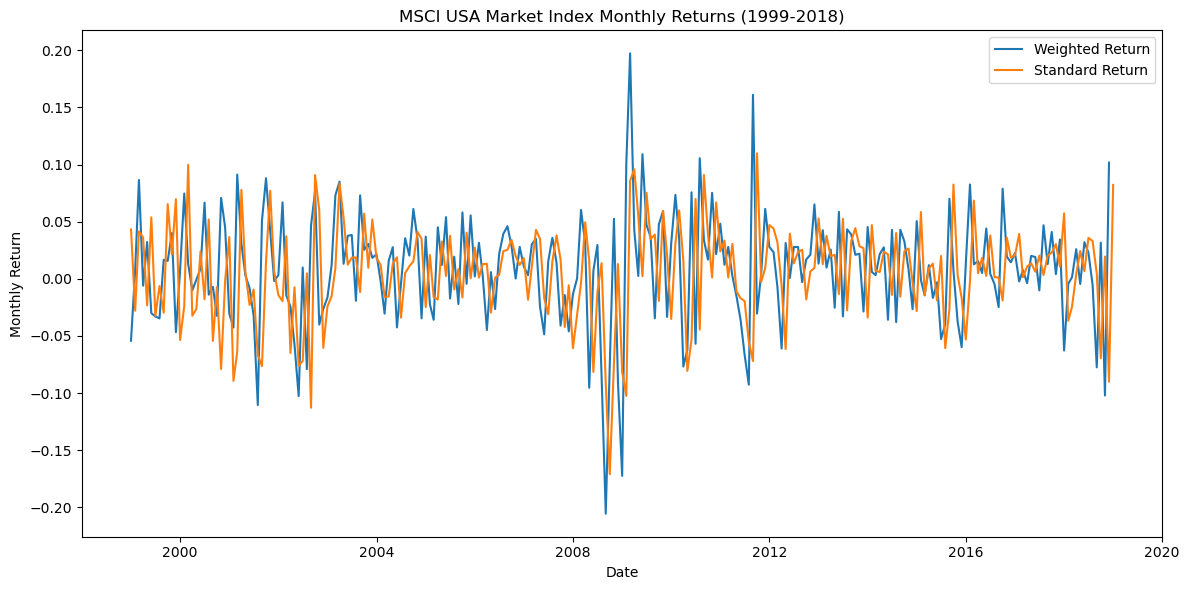

In [1232]:
# Plot the monthly returns for the MSCI USA market index
us_msci_ff_filtered_data = us_msci_ff_data['1999-01':'2019-01']
plt.figure(figsize=(12, 6))
plt.plot(weighted_return.index.to_timestamp(), weighted_return, label='Weighted Return')
plt.plot(us_msci_ff_filtered_data.index.to_timestamp(), us_msci_ff_filtered_data['Standard Return'], label='Standard Return')
plt.title('MSCI USA Market Index Monthly Returns (1999-2018)')
plt.xlabel('Date')
plt.ylabel('Monthly Return')
plt.legend()
plt.tight_layout()
plt.show()

T-Statistic for the difference in means between the two portfolios: 2.4851980117571344
Correlation between the two portfolios: 0.09222573468292236


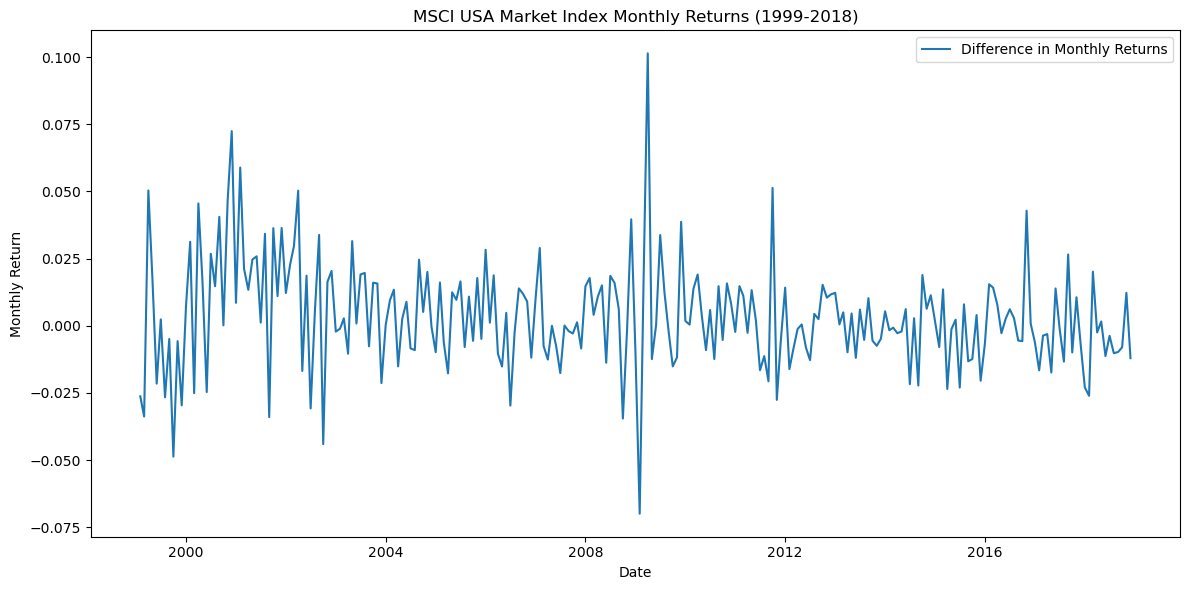

In [ ]:
# Calculate the t-statistic for the difference in means between the two portfolios

difference = weighted_return - us_msci_ff_filtered_data['Standard Return']
t_statistic = (difference.mean() - 0) / (difference.std() / np.sqrt(len(difference)))

# print(difference.describe())

print(f"T-Statistic for the difference in means between the two portfolios: {t_statistic}")

# # calculate the correlation between the two portfolios

correlation = weighted_return.corr(us_msci_ff_filtered_data['Standard Return'])

print(f"Correlation between the two portfolios: {correlation}")

plt.figure(figsize=(12, 6))
plt.plot(difference.index.to_timestamp(), difference, label='Difference in Monthly Returns')
plt.title('MSCI USA Market Index Monthly Returns (1999-2018)')
plt.xlabel('Date')
plt.ylabel('Monthly Return')
plt.legend()
plt.tight_layout()
plt.show()


In [1215]:
# Equally weight the top 20% of stocks by their book-to-price ratio

# As Pb is already standardized, we can use the raw Pb values to filter the top 20% of stocks
pb_filt_eq_wt_data = df_stocks_data_period[df_stocks_data_period['Pb'] < 0.2]

ret_filtered_eq_wt = pb_filt_eq_wt_data.groupby('date')['R1M_Usd'].mean()

terms = len(ret_filtered_eq_wt)

annualized_return_eq_wt = (1 + ret_filtered_eq_wt).cumprod().iloc[-1]**(12/terms) - 1

annualized_std_eq_wt = ret_filtered_eq_wt.std() * np.sqrt(12)

In [1216]:
# Weight stocks in proportion to the provided standardized (percentiled) exposure to the book-to-price ratio.
df_stocks_data_period.loc[:,'Bp_wt'] = 1 - df_stocks_data_period['Pb']

# Group by weight (1-Pb), pb are already standardized
ret_filtered_bp_wt = df_stocks_data_period.groupby('date').apply(lambda x: np.average(x['R1M_Usd'], weights=x['Bp_wt']))

annualized_return_bp_wt = (1 + ret_filtered_bp_wt).cumprod().iloc[-1]**(12/terms) - 1

annualized_std_bp_wt = ret_filtered_bp_wt.std() * np.sqrt(12)


C:\Users\saiki\AppData\Local\Temp\ipykernel_45348\24568400.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stocks_data_period.loc[:,'Bp_wt'] = 1 - df_stocks_data_period['Pb']
C:\Users\saiki\AppData\Local\Temp\ipykernel_45348\24568400.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ret_filtered_bp_wt = df_stocks_data_period.groupby('date').apply(lambda x: np.average(x['R1M_Usd'], weights=x['Bp_wt']))


In [1217]:
# Weight stocks in proportion to the provided standardized (percentiled) exposure to the book-to-price ratio TIMES their provided standardized market cap.
df_stocks_data_period.loc[:,'Bp_Mktcap_wt'] = df_stocks_data_period['Bp_wt']*df_stocks_data_period['Mkt_Cap_3M_Usd']

# Group by weight (1-Pb)*Mkt_Cap
ret_filtered_bp_mktcap_wt = df_stocks_data_period.groupby('date').apply(lambda x: np.average(x['R1M_Usd'], weights=x['Bp_Mktcap_wt']))


annualized_return_bp_mktcap_wt = (1 + ret_filtered_bp_mktcap_wt).cumprod().iloc[-1]**(12/terms) - 1

annualized_std_bp_mktcap_wt = ret_filtered_bp_mktcap_wt.std() * np.sqrt(12)


C:\Users\saiki\AppData\Local\Temp\ipykernel_45348\3556834045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_stocks_data_period.loc[:,'Bp_Mktcap_wt'] = df_stocks_data_period['Bp_wt']*df_stocks_data_period['Mkt_Cap_3M_Usd']
C:\Users\saiki\AppData\Local\Temp\ipykernel_45348\3556834045.py:5: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  ret_filtered_bp_mktcap_wt = df_stocks_data_period.groupby('date').apply(lambda x: np.average(x['R1M_Usd'], weights=x['

In [1218]:
print(f"Annualized return for equally weighted portfolio: {annualized_return_eq_wt:.4f} = {annualized_return_eq_wt*100:.2f}%")
print(f"Annualized return for Bp weighted portfolio: {annualized_return_bp_wt:.4f} = {annualized_return_bp_wt*100:.2f}%")
print(f"Annualized return for Bp*MktCap weighted portfolio: {annualized_return_bp_mktcap_wt:.4f} = {annualized_return_bp_mktcap_wt*100:.2f}%")

comment_return = """
The annualized return for the equally weighted portfolio is higher than the Bp weighted portfolio, which in turn is higher than the Bp*MktCap weighted portfolio. The stocks with lower Price to book gives higher returns as they are undervalued. Stocks with higher market cap don't fluctuate as much as so returns when there is higher weight to market cap is lower.
"""
print(comment_return,"\n")
print(f"Annualized standard deviation for equally weighted portfolio: {annualized_std_eq_wt:.4f}")
print(f"Annualized standard deviation for Pb weighted portfolio: {annualized_std_bp_wt:.4f}")
print(f"Annualized standard deviation for Pb*MktCap weighted portfolio: {annualized_std_bp_mktcap_wt:.4f}")

comment_std = """
The annualized standard deviation for equally weighted portfolio is higher than Bp weighted portfolio as they are more volatilte. The standard deviation for Bp weighted portfolio is higher than Bp*MktCap weighted portfolio as the stocks with higher market cap are less volatile.
"""

Annualized return for equally weighted portfolio: 0.2570 = 25.70%
Annualized return for Bp weighted portfolio: 0.1736 = 17.36%
Annualized return for Bp*MktCap weighted portfolio: 0.1182 = 11.82%

The annualized return for the equally weighted portfolio is higher than the Bp weighted portfolio, which in turn is higher than the Bp*MktCap weighted portfolio. The stocks with lower Price to book gives higher returns as they are undervalued. Stocks with higher market cap don't fluctuate as much as so returns when there is higher weight to market cap is lower.
 

Annualized standard deviation for equally weighted portfolio: 0.2368
Annualized standard deviation for Pb weighted portfolio: 0.1916
Annualized standard deviation for Pb*MktCap weighted portfolio: 0.1769


In [1219]:
last_period_date = '2018-09'
df_last_period = df_stocks_data_period[df_stocks_data_period["date"] == last_period_date]

# Calculate the number of stocks in the last period for all portfolios
num_stocks_Mktcap_Bp_wt = len(df_last_period)
num_stocks_Bp_wt = len(df_last_period)
num_stocks_eq_wt = len(df_last_period[df_last_period['Pb'] < 0.2])

# Calculate the portfolio weights for each stock in the last period
df_last_period['Bp_wt'] = 1 - df_last_period['Pb']
df_last_period['Mktcap_Bp_Weighted_Return'] = df_last_period['Mkt_Cap_3M_Usd'] * df_last_period['Bp_wt']

# Group by date and calculate the sum of weights for last period
Bp_weights_sum = df_last_period['Bp_wt'].sum()
Mktcap_Bp_weights_sum = df_last_period['Mktcap_Bp_Weighted_Return'].sum()

# Normalize the weights
df_last_period['Bp_wt_norm'] = df_last_period['Bp_wt'] / Bp_weights_sum

df_last_period['Mktcap_Bp_wt_norm'] = df_last_period['Mktcap_Bp_Weighted_Return'] / Mktcap_Bp_weights_sum

C:\Users\saiki\AppData\Local\Temp\ipykernel_45348\1372197689.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_period['Bp_wt'] = 1 - df_last_period['Pb']
C:\Users\saiki\AppData\Local\Temp\ipykernel_45348\1372197689.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_last_period['Mktcap_Bp_Weighted_Return'] = df_last_period['Mkt_Cap_3M_Usd'] * df_last_period['Bp_wt']
C:\Users\saiki\AppData\Local\Temp\ipykernel_45348\1372197689.py:18: SettingWithCopyWarning: 
A value is trying to be set on a co

In [1220]:
# Identify the portfolio with the least number of stocks and the highest single-stock weight

print(f"Number of stocks in MktCap BP Weight Portfolio: {num_stocks_Mktcap_Bp_wt}")
print(f"Number of stocks in BP Weight Portfolio: {num_stocks_Bp_wt}")
print(f"Number of stocks in equal weighted portfolio: {num_stocks_eq_wt}")

print(f"Highest single-stock weight in BP Weight Portfolio: {df_last_period['Bp_wt_norm'].max():.4f}")
print(f"Highest single-stock weight in MktCap BP Weight Portfolio: {df_last_period['Mktcap_Bp_wt_norm'].max():.4f}")
print(f"Highest single-stock weight in equal weighted portfolio: {1/len(df_last_period):.4f}")

print("The portfolio with the least number of stocks is the equal weighted portfolio, while the portfolio with the highest single-stock weight is the MktCap BP Weight Portfolio.")
print("The MktCap BP Weight Portfolio has the highest single-stock weight as it is weighted by both the book-to-price ratio and the market capitalization of the stocks. This is expected and helps reduce volatility of the portfolio.")

Number of stocks in MktCap BP Weight Portfolio: 1118
Number of stocks in BP Weight Portfolio: 1118
Number of stocks in equal weighted portfolio: 219
Highest single-stock weight in BP Weight Portfolio: 0.0018
Highest single-stock weight in MktCap BP Weight Portfolio: 0.0038
Highest single-stock weight in equal weighted portfolio: 0.0009
The portfolio with the least number of stocks is the equal weighted portfolio, while the portfolio with the highest single-stock weight is the MktCap BP Weight Portfolio.
The MktCap BP Weight Portfolio has the highest single-stock weight as it is weighted by both the book-to-price ratio and the market capitalization of the stocks. This is expected and helps reduce volatility of the portfolio.


## 2D. Excess Returns 

In [1221]:
combined_series = pd.concat([ret_filtered_eq_wt, ret_filtered_bp_wt, ret_filtered_bp_mktcap_wt, weighted_return ], axis=1)

combined_series.columns = ['Equally Weighted', 'Bp Weighted', 'Bp*MktCap Weighted', 'MktCap Weighted']

combined_series['Equally Weighted Excess'] = combined_series['Equally Weighted'] - combined_series['MktCap Weighted']
combined_series['Bp Weighted Excess'] = combined_series['Bp Weighted'] - combined_series['MktCap Weighted']
combined_series['Bp*MktCap Weighted Excess'] = combined_series['Bp*MktCap Weighted'] - combined_series['MktCap Weighted']

annualized_std_dev = combined_series[['Equally Weighted Excess', 'Bp Weighted Excess', 'Bp*MktCap Weighted Excess']].std() * np.sqrt(12)

print("Annualized Standard Deviation of the strategies over broad market cap weighted index")
print(annualized_std_dev)

Annualized Standard Deviation of the strategies over broad market cap weighted index
Equally Weighted Excess      0.119045
Bp Weighted Excess           0.054775
Bp*MktCap Weighted Excess    0.030185
dtype: float64


In [1222]:
combined_series['HML'] = df_factors.loc['1999-01':'2018-11'][['HML']]

correlation_matrix = combined_series[['Equally Weighted Excess', 'Bp Weighted Excess', 'Bp*MktCap Weighted Excess', 'HML']].corr()
print("Correlation Matrix", correlation_matrix)

Correlation Matrix                            Equally Weighted Excess  Bp Weighted Excess  \
Equally Weighted Excess                   1.000000            0.944428   
Bp Weighted Excess                        0.944428            1.000000   
Bp*MktCap Weighted Excess                 0.687748            0.704798   
HML                                       0.142005            0.143211   

                           Bp*MktCap Weighted Excess       HML  
Equally Weighted Excess                     0.687748  0.142005  
Bp Weighted Excess                          0.704798  0.143211  
Bp*MktCap Weighted Excess                   1.000000  0.174977  
HML                                         0.174977  1.000000  
